# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [19]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
# plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
sns.set_palette('viridis')
# %matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [20]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv')

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [21]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescription of Data Containing numerical Values:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64

Description of Data Containing numerical Values:
               Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count  1.048576e+

In [22]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
years = np.array(list(set(df['Year'])))
column_header = df.columns.tolist() # it will make easier to select column for data representation eg 0 for Year
yearly_data = df.groupby('Year') #Data grouped together on the basis of year

def individual_year(year):
    return yearly_data.get_group(year)

aggregated_data = df.groupby('Year').agg('mean')

aggregated_data


,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,,,,
1900,14.506663,350.373405,150.408288,8.978659
1901,14.485343,349.757140,150.548828,8.947272
1902,14.476262,349.299686,152.174821,9.035554
1903,14.492360,349.644375,150.138338,9.056501
1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...
2019,14.500105,348.642249,151.020415,9.014690
2020,14.496937,350.021731,150.219741,9.054254
2021,14.501424,350.150302,150.187456,8.968700


In [23]:
# Resetting years as an index and setting as an normal columns
aggregated_data = aggregated_data.reset_index()
aggregated_data

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691
...,...,...,...,...,...
119,2019,14.500105,348.642249,151.020415,9.014690
120,2020,14.496937,350.021731,150.219741,9.054254
121,2021,14.501424,350.150302,150.187456,8.968700
122,2022,14.495233,350.493023,148.857646,8.942012


## 2. Univariate Analysis

Analyze each climate variable independently.

#### For the univariate analysis of our climate variables—Global Average Temperature (°C), CO₂ Concentration (ppm), Sea Level Rise (mm), and Arctic Ice Area (million km²)—we implemented a comprehensive visualization strategy. Specifically, we created:

- Histogram Plots to display the frequency distribution of each variable.
- Box Plots to highlight central tendencies and potential outliers.
- Line Plots to track trends over time.
- Barcharts to compare values across selected time intervals.
- KDE Plots to provide a smoothed estimate of the data’s probability density.
- Violin Plots to combine the benefits of box plots and density curves.
#### Following these visualizations, we performed a detailed exploratory data analysis (EDA) based on the pictorial representations to extract meaningful insights from the data.

In [24]:
# Function to create the Histplot, Box plot, Line plot, Barcharts, KDE plots and Violin Plot of all the independent variables of the datasets
def univariate_analysis(df):
    for var in df.columns:
        if var != 'Year':
            print(f"Univariate Analysis for {var} \n ")
            print(df[var].describe(), "\n\nCreating plots ... \n\n")

            plt.figure(figsize=(12, 12))  # Adjust figure size

            # 1. Histogram
            plt.subplot(3, 2, 1)
            sns.histplot(data=df, x=var, kde=True, bins=30, edgecolor='black')
            plt.title(f"Histogram of {var}")
            plt.xlabel(var)
            plt.ylabel('Frequency')

            # 2. Box Plot
            plt.subplot(3, 2, 2)
            sns.boxplot(x=df[var], orient='h')
            plt.title(f"Boxplot of {var}")
            plt.xlabel(var)

            # 3. Line Plot
            plt.subplot(3, 2, 3)
            plt.plot(df['Year'], df[var], marker='o', linestyle='-')
            plt.title(f'Trend of {var} Over Time')
            plt.xlabel('Year')
            plt.ylabel(var)
            plt.grid(True)

            # 4. Bar Chart (Every 10 Years)
            plt.subplot(3, 2, 4)
            filtered_data = df[df['Year'] % 10 == 0]  # Select every 10th year
            sns.barplot(x=filtered_data['Year'], y=filtered_data[var])
            plt.title(f'{var} Over the Years')
            plt.xlabel('Year')
            plt.ylabel(var)
            plt.xticks(rotation=45)

            # 5. KDE Plot (Replaces Displot)
            plt.subplot(3, 2, 5)
            sns.kdeplot(df[var], fill=True)
            plt.title(f'KDE Plot of {var}')
            plt.xlabel(var)
            plt.ylabel('Density')

            # 6. Violin Plot (Better for Distribution Analysis)
            plt.subplot(3, 2, 6)
            sns.violinplot(x=df[var])
            plt.title(f'Violin Plot of {var}')
            plt.xlabel(var)

            # Adjust layout and display all subplots together
            plt.tight_layout()
            plt.show()

# univariate_analysis(aggregated_data)

#### Univariate Analysis Conclusion and Insights

- Global Average Temperature
	- Global average temperature appears to be centered around 14.5°C with a relatively narrow spread, as shown by the histogram and KDE plot. The boxplot and violin plot confirm only minor variability, indicating most data points lie within a tight band around the median. From the line chart, there are slight year-to-year fluctuations rather than a pronounced upward or downward trend. The bar chart reinforces this consistency, with values hovering close to 14.5°C across the observed period. Overall, the dataset suggests stable global temperatures within a narrow range, though further analysis over a longer timeframe or with additional climate variables could provide deeper insights


- Co2 concentration
	- The frequncy distribution of Co2 values are clustre near 350 ppm (with a narrow range 349 - 351), this suggests that dataset is tightly centered. Boxplot represents that the median is near 350 ppm and there appear to be no extreme outliers. So the data is quite uniform. Co2 trend over time oscillates slightly but does not show a strong upward or downward trend. The Co2 values remains between 249-351 ppm. The barchart shows that there is little variations between selected years.Violin plot show that the violin is narrow, indicate low variances with center near 350 ppm aligning with other plots.

- Sea Level Rise
	- Sea level rise data is centered around approximately 149–151 mm, with minimal variation indicated by the histogram, KDE, and violin plots. The line plot shows modest year-to-year fluctuations but no strong long-term trend. The boxplot suggests few outliers and a relatively narrow range. Overall, the data points to stable sea levels within this observed period

- Arcti Ice Area
	- Arctic ice area appears to be centered around a relatively narrow range (8.9 - 9.15 million km2), with minimal variation shown by the histogram and KDE plots. The boxplot and violin plot indicate a fairly symmetric distribution, suggesting few extreme outliers. From the line chart, there are mild fluctuations over the observed period, but no dramatic trend is immediately evident. The bar chart likewise shows values clustered near a central level across different years. Overall, the data suggests relatively stable Arctic ice area in this dataset.


## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

#### For the bi-variate analysis of our climate variables—Global Average Temperature (°C), CO₂ Concentration (ppm), Sea Level Rise (mm), and Arctic Ice Area (million km²), we have implemented a comprehensive visualization strategy. Specifically, we created:

- Line Plots - to track trends over time.
- Scatter Plots - to explore relationships between variable pairs.
- Regression Plots - to assess and quantify linear associations.
- Heatmaps/Correlation Matrices - to visualize the interdependencies among the variables.
#### Following these visualizations, we conducted a detailed exploratory data analysis (EDA) based on the pictorial representations to extract key insights and trends.

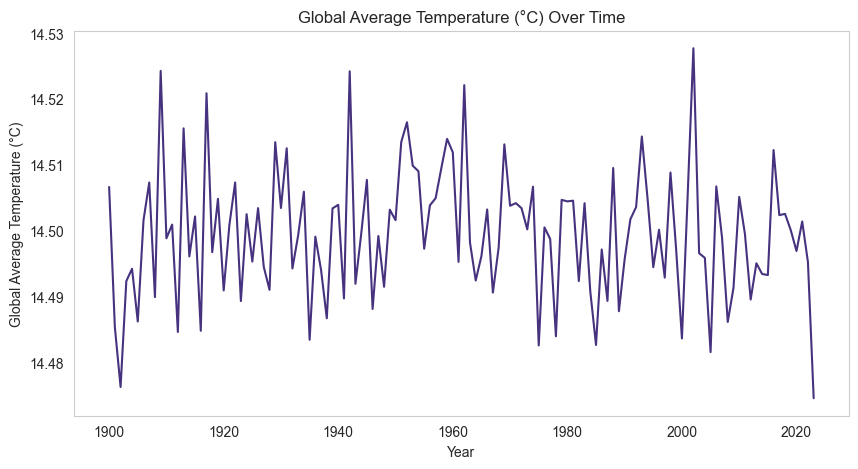

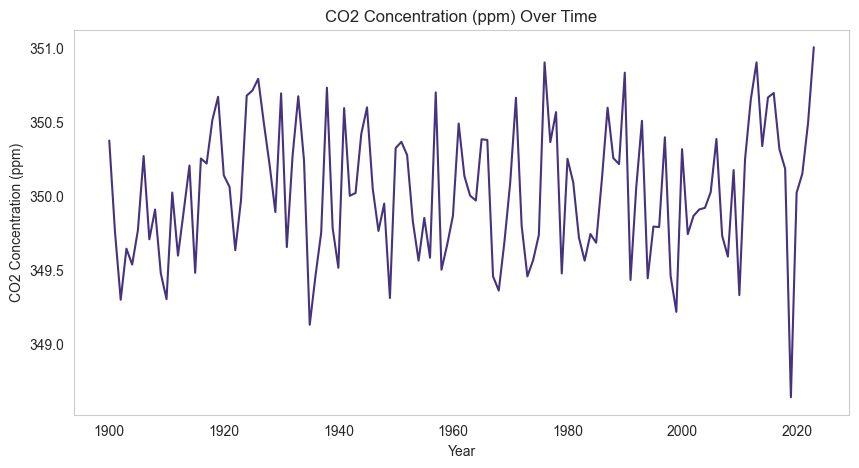

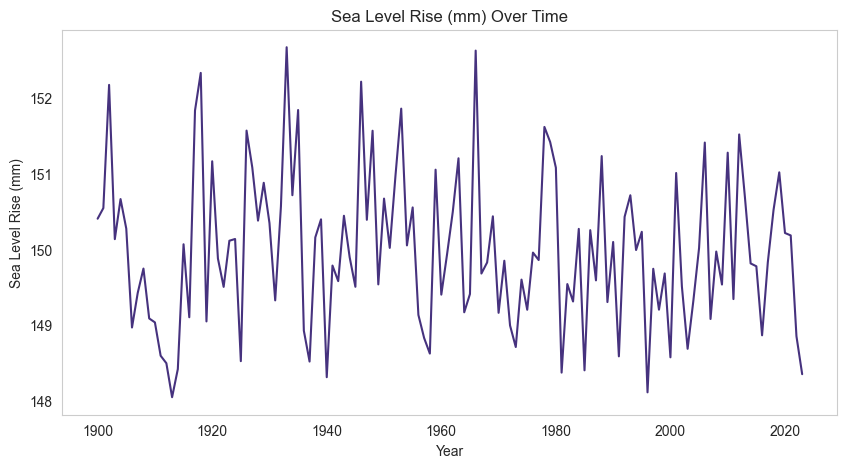

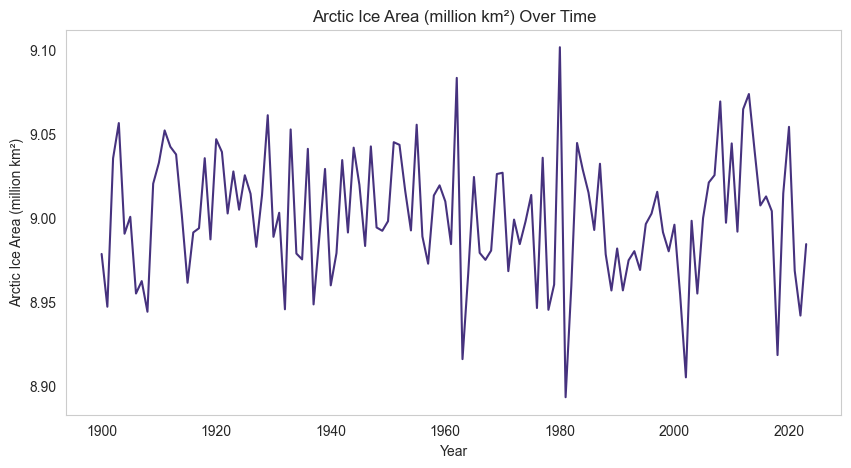

In [25]:
# Function to generate the line plot for all the climate variables
def bivariate_lineplot_analysis(df):
	for var in df.columns:
		if var != 'Year':
			plt.figure(figsize=(10, 5))
			plt.plot(df['Year'], df[var])
			plt.title(f'{var} Over Time')
			plt.xlabel('Year')
			plt.ylabel(var)
			plt.grid(False)
			plt.show()

bivariate_lineplot_analysis(aggregated_data)

#### Bivariate Analysis of different climate variables with respect to the yearly time frame.

- Global Average Temperature
	- From the line chart, we found out that there are slight year-to-year fluctuations rather than a pronounced upward or downward trend. Minimum value 14.4 °C, Maximum Value 14.5 °C

- Co2 concentration
	- The data is quite uniform. Co2 trend over time oscillates slightly but does not show a strong upward or downward trend. The Co2 values remains between 348.6-351 ppm. 

- Sea Level Rise
	- The line plot shows modest year-to-year fluctuations but no strong long-term trend. Minimum value 148.05 mm, Maximum Value 152.6 mm

- Arcti Ice Area
	- It is found out that there are mild fluctuations over the observed period, but no dramatic trend is immediately evident. Max is 9.1 and min is 8.89 million km²


In [ ]:
# Line Plot (Trend over time / year bivariate analysis )

# print(aggregated_data.columns)

var = aggregated_data.columns[1]

plt.figure(figsize=(20, 5))
plt.plot(aggregated_data['Year'], aggregated_data[var],  marker='o')
plt.title(f'Trend of {var} Over Time')
plt.xlabel('Year')
plt.ylabel(var)
plt.grid(False)
plt.show()

In [ ]:
# Line Plot (Trend over time / year bivariate analysis )

# print(aggregated_data.columns)

var = "Arctic Ice Area (million km²)"

plt.figure(figsize=(20, 5))
plt.plot(aggregated_data['Year'], aggregated_data[var],  marker='o')
plt.title(f'Trend of {var} Over Time')
plt.xlabel('Year')
plt.ylabel(var)
plt.grid(False)
plt.show()

In [ ]:
# Scatter Plot Bivariate Analysis (Sea Level Vs Temperatures)

plt.figure(figsize=(7,5))
sns.scatterplot(y = "Sea Level Rise (mm)", x = "Global Average Temperature (°C)", data = aggregated_data, )
# adding features
plt.title("Scatter Plot: Global Average Temperature vs Sea Level Rise")
plt.ylabel("Sea Level Rise (mm)")
plt.xlabel("Gloval Average Temperature")
plt.grid(False)
plt.show()


In [ ]:
# Regression Analysis - Regression Plot: Arctic Ice Area vs. Global Temperature
# Adding trend to the scatter plot

plt.figure(figsize=(7,5))
sns.regplot(x =  "Global Average Temperature (°C)" , y = "Sea Level Rise (mm)", data = aggregated_data)

# adding features
plt.title("Regression Analysis - Trend: Sea Level Rise vs Global Average Temperature")
plt.ylabel("Sea Level Rise (mm)")
plt.xlabel("Gloval Average Temperature")
plt.grid(False)
plt.show()


In [ ]:
# Violin Plots - Global Temperature over the years
plt.figure(figsize=(7,5))
sns.violinplot(y = aggregated_data["Global Average Temperature (°C)"])

# adding features
plt.title("Violin Plot: Global Temperature Distribution (1900 - 2023)")
plt.ylabel("Global Average Temperature")
plt.grid(False)
plt.xticks(rotation=100)
plt.show()


In [ ]:
# 1987 Yearly Regression Analysis of Global Temp and Sea Level

# data_for_year = individual_year(1987)
# data_for_year



In [ ]:
# plt.figure(figsize=(7,5))
# sns.regplot(x =  "Global Average Temperature (°C)" , y = "Sea Level Rise (mm)", data = data_for_year, scatter_kws={"color": "green"}, line_kws={"color": "red"})

# # adding features
# plt.title("Regression Analysis - (1987) Trend: Sea Level Rise WRT Global Average Temperature")
# plt.ylabel("Sea Level Rise (mm)")
# plt.xlabel("Gloval Average Temperature")
# plt.grid(False)
# plt.show()

In [ ]:
# Heatmap or Correlation matrix

def create_heatmap(df):
	plt.figure(figsize=(6,6))

	corr_matrix = df.corr()

	sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
	plt.title("Heatmap / Correlation Matrix")
	plt.show()

	return corr_matrix

# Drop year from aggregated_data
df_heatmap = aggregated_data.drop(columns=['Year'], errors="ignore")

create_heatmap(df_heatmap)

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

In [ ]:
df_mv = aggregated_data.drop(columns=['Year'])
df_mv

In [ ]:
# Pair Plot
sns.pairplot(df_mv, kind="reg", diag_kind="kde", markers="o", plot_kws={'scatter_kws': {'alpha': 0.6}})
plt.show()

In [ ]:
# Heatmap or Correlation matrix

def create_heatmap(df):
	plt.figure(figsize=(6,6))

	corr_matrix = df.corr()

	sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
	plt.title("Heatmap / Correlation Matrix")
	plt.show()

	return corr_matrix

# Drop year from aggregated_data
df_heatmap = aggregated_data.drop(columns=['Year'], errors="ignore")

create_heatmap(df_heatmap)

In [ ]:
# # Andrews Curves
# aggregated_data['Decade'] =  (aggregated_data['Year'] // 10) * 10
# aggregated_data['Decade'] = aggregated_data['Decade'].astype(str) + "s"

# df_andrews = aggregated_data.drop(columns=["Year"])

# plt.figure(figsize=(10, 8))
# pd.plotting.andrews_curves(df_andrews, class_column="Decade", colormap="viridis")
# plt.title("Andrews Curves Grouped by Decades")
# plt.show()

In [ ]:
# columns name
aggregated_data.columns

In [ ]:
# 3D Scatter Plot // copied from stack overflow
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(aggregated_data["CO2 Concentration (ppm)"], aggregated_data["Sea Level Rise (mm)"], aggregated_data["Global Average Temperature (°C)"], c=aggregated_data["Global Average Temperature (°C)"], cmap="coolwarm", edgecolor="k", alpha=0.8)

# Labels and title of 3d Plots
ax.set_xlabel("CO2 Concentration (ppm)")
ax.set_ylabel("Sea Level Rise (mm)")
ax.set_zlabel("Global Avg Temperature (°C)")
ax.set_title("3D Scatter: Temperature vs CO2 vs Sea Level Rise")

# For referencing wising different colors
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Temperature (°C)")
plt.show()

## 5. Conclusions and Insights

Our analysis found that the correlation values between Global Average Temperature, CO₂ Concentration, Sea Level Rise, and Arctic Ice Area are all relatively small (close to 0). This suggests weak relationships between the variables, meaning that changes in one do not strongly predict changes in another.

Surprisingly, we observed a weak negative correlation between Global Temperature and CO₂ Concentration. Typically, we expect a positive correlation, as higher CO₂ levels are known to drive temperature increases, but that pattern is not evident in this dataset.

Similarly, there is almost no correlation between Global Temperature and Sea Level Rise, indicating no direct relationship within the dataset. However, CO₂ Concentration and Sea Level Rise show a slight positive correlation, suggesting that rising CO₂ levels might contribute to sea level increase, albeit weakly.

An unexpected weak positive correlation between Sea Level Rise and Arctic Ice Area was also observed. Since melting Arctic ice should contribute to sea level rise, we would normally expect a negative correlation instead.

Lastly, Global Temperature and Arctic Ice Area also show a weak positive correlation, contradicting the expected inverse relationship where higher temperatures typically lead to reduced Arctic ice.

These findings indicate the need for further analysis, considering additional climate factors and potential non-linear relationships.
